# Telecom Churn - Group Case Study




## Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [205]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


# IMPORT AND INSPECT DATA

In [206]:
telecom_df = pd.read_csv("telecom_churn_data.csv") #create df by reading data 
telecom_df.head() #displays first 5 lines of code

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [207]:
telecom_df.shape

(99999, 226)

#### There are about 226 features describing the customer data and 99999 unique customer data

In [208]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


# DATA CLEANING

###  IMPUTING MISSING VALUES

In [209]:
#function to calculate null value and percebtage of null

def find_NaN(df):
    NaN_cnt = df.isna().sum()
    NaN_pct = (df.isna().sum()/df.isna().count()*100)
    return pd.concat([NaN_cnt, NaN_pct], axis=1, keys=['Cnt_of_Nulls', 'Null_Percentage'])

In [210]:
nul_val=find_NaN(telecom_df)
nul_val

,Cnt_of_Nulls,Null_Percentage
mobile_number,0,0.00000
circle_id,0,0.00000
loc_og_t2o_mou,1018,1.01801
std_og_t2o_mou,1018,1.01801
loc_ic_t2o_mou,1018,1.01801
...,...,...
aon,0,0.00000
aug_vbc_3g,0,0.00000
jul_vbc_3g,0,0.00000
jun_vbc_3g,0,0.00000


In [211]:
nul_val[nul_val.Cnt_of_Nulls>0]#display columns with null values

,Cnt_of_Nulls,Null_Percentage
loc_og_t2o_mou,1018,1.018010
std_og_t2o_mou,1018,1.018010
loc_ic_t2o_mou,1018,1.018010
last_date_of_month_7,601,0.601006
last_date_of_month_8,1100,1.100011
...,...,...
night_pck_user_9,74077,74.077741
fb_user_6,74846,74.846748
fb_user_7,74428,74.428744
fb_user_8,73660,73.660737


In [212]:
nul_val[nul_val.Null_Percentage>50]#checking cols with more than 50% null

,Cnt_of_Nulls,Null_Percentage
date_of_last_rech_data_6,74846,74.846748
date_of_last_rech_data_7,74428,74.428744
date_of_last_rech_data_8,73660,73.660737
date_of_last_rech_data_9,74077,74.077741
total_rech_data_6,74846,74.846748
total_rech_data_7,74428,74.428744
total_rech_data_8,73660,73.660737
total_rech_data_9,74077,74.077741
max_rech_data_6,74846,74.846748
max_rech_data_7,74428,74.428744


In [213]:
nul_val[nul_val.Null_Percentage>50].index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

#### Of the above columns, there are a few columns where a missing value would mean there was no data, hence we can impute it with ), rather than mean or median.
#### For example, the NA in recharge columns would mean no recharge was done, hence we can impute with 0

In [214]:
imputeCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']

In [215]:
for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeCol]:
    telecom_df[col].fillna(0, inplace=True)

In [216]:
nul_val=find_NaN(telecom_df)
nul_val

,Cnt_of_Nulls,Null_Percentage
mobile_number,0,0.00000
circle_id,0,0.00000
loc_og_t2o_mou,1018,1.01801
std_og_t2o_mou,1018,1.01801
loc_ic_t2o_mou,1018,1.01801
...,...,...
aon,0,0.00000
aug_vbc_3g,0,0.00000
jul_vbc_3g,0,0.00000
jun_vbc_3g,0,0.00000


In [217]:
nul_val[nul_val.Null_Percentage>0]#checking cols with null vals

,Cnt_of_Nulls,Null_Percentage
loc_og_t2o_mou,1018,1.018010
std_og_t2o_mou,1018,1.018010
loc_ic_t2o_mou,1018,1.018010
last_date_of_month_7,601,0.601006
last_date_of_month_8,1100,1.100011
...,...,...
date_of_last_rech_9,4760,4.760048
date_of_last_rech_data_6,74846,74.846748
date_of_last_rech_data_7,74428,74.428744
date_of_last_rech_data_8,73660,73.660737


In [218]:
nul_val[nul_val.Null_Percentage>50]#checking cols with more than 50% null

,Cnt_of_Nulls,Null_Percentage
date_of_last_rech_data_6,74846,74.846748
date_of_last_rech_data_7,74428,74.428744
date_of_last_rech_data_8,73660,73.660737
date_of_last_rech_data_9,74077,74.077741


In [219]:
# Dropping the columns from the dataframe with null percentange 50 or more

telecom_df.drop(nul_val[nul_val.Null_Percentage>50].index, inplace=True, axis=1)
telecom_df.shape

(99999, 222)

In [220]:
nul_val=find_NaN(telecom_df)

In [221]:
nul_val[nul_val.Null_Percentage>7]

,Cnt_of_Nulls,Null_Percentage
onnet_mou_9,7745,7.745077
offnet_mou_9,7745,7.745077
roam_ic_mou_9,7745,7.745077
roam_og_mou_9,7745,7.745077
loc_og_t2t_mou_9,7745,7.745077
loc_og_t2m_mou_9,7745,7.745077
loc_og_t2f_mou_9,7745,7.745077
loc_og_t2c_mou_9,7745,7.745077
loc_og_mou_9,7745,7.745077
std_og_t2t_mou_9,7745,7.745077


#### Looks like for Month 9, there are missing data for the above column, with each column having 7.745% missing value 

In [222]:

# checking if all these above features go missing together since they have the same 8% missing values in each feature.

telecom_df[telecom_df[list(nul_val[nul_val.Null_Percentage>7].index)].isnull().all(axis=1)][list(nul_val[nul_val.Null_Percentage>7].index)].head()

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,...,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### we can impute the above rows with 0, as all the columns of the row is NA

In [223]:
for col in list(nul_val[nul_val.Null_Percentage>7].index):
            telecom_df[col].fillna(0, inplace=True)

In [224]:
nul_val=find_NaN(telecom_df)
nul_val[nul_val.Null_Percentage>7]

,Cnt_of_Nulls,Null_Percentage


In [225]:
nul_val[nul_val.Null_Percentage>1]

,Cnt_of_Nulls,Null_Percentage
loc_og_t2o_mou,1018,1.018010
std_og_t2o_mou,1018,1.018010
loc_ic_t2o_mou,1018,1.018010
last_date_of_month_8,1100,1.100011
last_date_of_month_9,1659,1.659017
...,...,...
ic_others_8,5378,5.378054
date_of_last_rech_6,1607,1.607016
date_of_last_rech_7,1767,1.767018
date_of_last_rech_8,3622,3.622036


In [226]:
nul_val[nul_val.Null_Percentage>2]

,Cnt_of_Nulls,Null_Percentage
onnet_mou_6,3937,3.937039
onnet_mou_7,3859,3.859039
onnet_mou_8,5378,5.378054
offnet_mou_6,3937,3.937039
offnet_mou_7,3859,3.859039
...,...,...
ic_others_6,3937,3.937039
ic_others_7,3859,3.859039
ic_others_8,5378,5.378054
date_of_last_rech_8,3622,3.622036


In [227]:
telecom_df[telecom_df[list(nul_val[nul_val.Null_Percentage>2].index)].isnull().all(axis=1)][list(nul_val[nul_val.Null_Percentage>2].index)].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### There are a few customer with nullValues across all the columns with more than 2% missing values, lets drop these rows

In [228]:

telecom_df=telecom_df[~telecom_df[list(nul_val[nul_val.Null_Percentage>2].index)].isnull().all(axis=1)]
telecom_df.shape

(99618, 222)

In [229]:
nul_val=find_NaN(telecom_df)
nul_val[nul_val.Null_Percentage>0]

,Cnt_of_Nulls,Null_Percentage
loc_og_t2o_mou,637,0.639443
std_og_t2o_mou,637,0.639443
loc_ic_t2o_mou,637,0.639443
last_date_of_month_7,318,0.319219
last_date_of_month_8,751,0.753880
...,...,...
ic_others_8,4997,5.016162
date_of_last_rech_6,1482,1.487683
date_of_last_rech_7,1461,1.466602
date_of_last_rech_8,3241,3.253428


#### There are still 97 columns which have missing values. lets impute them

#### But before imputing, let us identify the categorical and Continous data from the 214 numeric columns

In [230]:
c=list(telecom_df.select_dtypes(exclude=object).columns) #selecting only columns with non object data type

In [231]:
## Creating function to identify the categorical variables 
## using logic that categorical values would have few unique values, we will consider 10 unique values
cat=[]
def cat_col(na):
    for i in na:
        if len(telecom_df[i].unique())<=10:
            cat.append(i)
    return cat

In [232]:
cat_col(c)

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_2g_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

####  lets check the Unique values for the categorical columns and take actions

In [233]:
for i in cat:
    print("Unique values in column %s are %s" % (i,telecom_df[i].unique())) #check the unique values 

Unique values in column circle_id are [109]
Unique values in column loc_og_t2o_mou are [ 0. nan]
Unique values in column std_og_t2o_mou are [ 0. nan]
Unique values in column loc_ic_t2o_mou are [ 0. nan]
Unique values in column std_og_t2c_mou_6 are [nan  0.]
Unique values in column std_og_t2c_mou_7 are [nan  0.]
Unique values in column std_og_t2c_mou_8 are [ 0. nan]
Unique values in column std_og_t2c_mou_9 are [0.]
Unique values in column std_ic_t2o_mou_6 are [nan  0.]
Unique values in column std_ic_t2o_mou_7 are [nan  0.]
Unique values in column std_ic_t2o_mou_8 are [ 0. nan]
Unique values in column std_ic_t2o_mou_9 are [0.]
Unique values in column night_pck_user_6 are [0. 1.]
Unique values in column night_pck_user_7 are [0. 1.]
Unique values in column night_pck_user_8 are [0. 1.]
Unique values in column night_pck_user_9 are [0. 1.]
Unique values in column monthly_2g_6 are [0 1 2 3 4]
Unique values in column monthly_2g_7 are [0 1 2 5 4 3]
Unique values in column monthly_2g_8 are [0 1 2

In [234]:
#Some of the above features take only one value that is 0, let us impute the missing values for these with 0.
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']
for c in col:
    telecom_df[c].fillna(0, inplace=True)


In [235]:
# recheck

for i in cat:
    print("Unique values in column %s are %s" % (i,telecom_df[i].unique()))

Unique values in column circle_id are [109]
Unique values in column loc_og_t2o_mou are [0.]
Unique values in column std_og_t2o_mou are [0.]
Unique values in column loc_ic_t2o_mou are [0.]
Unique values in column std_og_t2c_mou_6 are [0.]
Unique values in column std_og_t2c_mou_7 are [0.]
Unique values in column std_og_t2c_mou_8 are [0.]
Unique values in column std_og_t2c_mou_9 are [0.]
Unique values in column std_ic_t2o_mou_6 are [0.]
Unique values in column std_ic_t2o_mou_7 are [0.]
Unique values in column std_ic_t2o_mou_8 are [0.]
Unique values in column std_ic_t2o_mou_9 are [0.]
Unique values in column night_pck_user_6 are [0. 1.]
Unique values in column night_pck_user_7 are [0. 1.]
Unique values in column night_pck_user_8 are [0. 1.]
Unique values in column night_pck_user_9 are [0. 1.]
Unique values in column monthly_2g_6 are [0 1 2 3 4]
Unique values in column monthly_2g_7 are [0 1 2 5 4 3]
Unique values in column monthly_2g_8 are [0 1 2 5 3 4]
Unique values in column monthly_2g_9 

#### Now let us go ahead and impute the missing values 

In [236]:
nul_val=find_NaN(telecom_df)
nul_val[nul_val.Null_Percentage>0] #columns with null

,Cnt_of_Nulls,Null_Percentage
last_date_of_month_7,318,0.319219
last_date_of_month_8,751,0.753880
last_date_of_month_9,1297,1.301974
onnet_mou_6,3556,3.569636
onnet_mou_7,3478,3.491337
...,...,...
ic_others_8,4997,5.016162
date_of_last_rech_6,1482,1.487683
date_of_last_rech_7,1461,1.466602
date_of_last_rech_8,3241,3.253428


In [237]:
#making a list of columns with null
na=list(nul_val[nul_val.Null_Percentage>0].index)


In [238]:
c=list(telecom_df[na].select_dtypes(include=object).columns) #selecting only columns with object data type

In [239]:
c #columns with null value and which are categorical

['last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [240]:
#let us replace these columns with mode value
# impute missing values with mode for catergorical data
for i in c:
    telecom_df[i] = telecom_df[i].fillna(telecom_df[i]).mode()[0]

In [241]:
nul_val=find_NaN(telecom_df)
nul_val[nul_val.Null_Percentage>0] #columns with null
num=list(nul_val[nul_val.Null_Percentage>0].index)


In [242]:
#let us replace these columns with median value
# impute missing values with mode for numerical data
for i in num:
    telecom_df[i].fillna(telecom_df[i].median(), inplace=True)

In [243]:
nul_val=find_NaN(telecom_df)
nul_val[nul_val.Null_Percentage>0] #columns with null

,Cnt_of_Nulls,Null_Percentage


### There are no null values

In [244]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99618 entries, 0 to 99998
Columns: 222 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(8)
memory usage: 169.5+ MB


In [245]:
col=list(telecom_df.columns)
col

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

# GETTING HIGH-VALUE CUSTOMERS 
### (BASED ON PARETO RULE OR 80-20 RULE)


In [246]:

# calculate the total data recharge amount for June and July (good phase)
# total data rech=number of recharges * average recharge amount
telecom_df['total_data_rech_6'] = telecom_df.total_rech_data_6 * telecom_df.av_rech_amt_data_6
telecom_df['total_data_rech_7'] = telecom_df.total_rech_data_7 * telecom_df.av_rech_amt_data_7

In [247]:
# calculate overal total recharge amount 
# total recharge=call recharge amount + data recharge amount
telecom_df['total_rech_6'] = telecom_df.total_rech_amt_6 + telecom_df.total_data_rech_6
telecom_df['total_rech_7'] = telecom_df.total_rech_amt_7 + telecom_df.total_data_rech_7

In [248]:
# calculate average recharge done by customer in June and July
#average recharge=total recharge june + total recharge july/2
telecom_df['av_rech_amt_6_7'] = (telecom_df.total_rech_6 + telecom_df.total_rech_7)/2

In [249]:
# 70th percentile recharge amount
print("Recharge amount at 70th percentile is {0}".format(telecom_df.av_rech_amt_6_7.quantile(0.7)))

Recharge amount at 70th percentile is 479.5


#### We would filter out the top 30% customer as high value customer, there customers would have av_rech_amt_6_7>= 70% percentile of av_rech_amt_6_7


In [250]:
# retain  customers who have recharged their mobiles with more than or equal to 70th percentile amount
telecom_HVC = telecom_df.loc[telecom_df.av_rech_amt_6_7 >= telecom_df.av_rech_amt_6_7.quantile(0.7), :]
telecom_HVC = telecom_HVC.reset_index(drop=True)
telecom_HVC.shape

(29906, 227)

In [251]:
# drop columns created to filter high-value customers
telecom_HVC = telecom_HVC.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'total_rech_6', 'total_rech_7', 'av_rech_amt_6_7'], axis=1)
telecom_HVC.shape

(29906, 222)

#### We're left with 29906 rows and 222 columns

_________________________________________________________________________________

# DERIVE CHURN
#### 9TH MONTH IS CONSIDERED AS CHURN PERIOD, WE WILL USE USUAGE BASED CHURN TECHNIQUE  

In [252]:
#claculate total call activity
telecom_HVC['total_calls_mou_9'] = telecom_HVC.total_ic_mou_9 + telecom_HVC.total_og_mou_9

# calculate total data consumption
telecom_HVC['total_internet_mb_9'] =  telecom_HVC.vol_2g_mb_9 + telecom_HVC.vol_3g_mb_9

In [253]:
# create churn variable: those who have neither have any calls nor internet used

# 0 - not churn, 1 - churn
telecom_HVC['churn'] = telecom_HVC.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [254]:
telecom_HVC.churn.value_counts()*100/telecom_HVC.shape[0]

0    91.914666
1     8.085334
Name: churn, dtype: float64

##### There is a high imblance in data, we will use balancing techniques later 

In [255]:
# we no longer require columns for september month, hence we shall delete them

drop_9_columns = telecom_HVC.filter(regex='_9') #cols with _9 in them
telecom_HVC.drop(list(drop_9_columns.columns),axis=1,inplace=True) #drop cols

In [256]:
telecom_HVC

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1
1,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1
2,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,0,0.0,1.0,1.0,315,21.03,910.65,122.16,0.00,0
3,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,...,0,0.0,0.0,0.0,720,0.00,0.00,0.00,0.00,0
4,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,...,1,0.0,1.0,1.0,604,40.45,51.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29901,7000630859,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,384.316,255.405,...,0,1.0,1.0,1.0,473,1100.43,619.59,668.05,0.33,0
29902,7000661676,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,328.594,202.966,...,0,1.0,1.0,1.0,820,0.00,0.00,0.00,0.00,0
29903,7001729035,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,644.973,455.228,...,0,1.0,1.0,1.0,2696,497.45,598.67,604.08,0.00,0
29904,7002111859,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,312.558,512.932,...,0,0.0,1.0,1.0,328,104.73,0.00,0.00,0.00,0


#### Data now has 171 columns and 29906 row

# DERIVE NEW FEATURES 

### Calculate difference between 8th and previous months (6th and 7th)

#### Let's derive some variables. The most important feature, in this situation, can be the difference between the usage (8th month) and good phase (6th and 7th month)

In [257]:
telecom_HVC['total_rech_num_diff'] = telecom_HVC.total_rech_num_8 - ((telecom_HVC.total_rech_num_6 + telecom_HVC.total_rech_num_7)/2)

telecom_HVC['total_rech_amt_diff'] = telecom_HVC.total_rech_amt_8 - ((telecom_HVC.total_rech_amt_6 + telecom_HVC.total_rech_amt_7)/2)

telecom_HVC['max_rech_amt_diff'] = telecom_HVC.max_rech_amt_8 - ((telecom_HVC.max_rech_amt_6 + telecom_HVC.max_rech_amt_7)/2)

telecom_HVC['total_rech_data_diff'] = telecom_HVC.total_rech_data_8 - ((telecom_HVC.total_rech_data_6 + telecom_HVC.total_rech_data_7)/2)

telecom_HVC['max_rech_data_diff'] = telecom_HVC.max_rech_data_8 - ((telecom_HVC.max_rech_data_6 + telecom_HVC.max_rech_data_7)/2)

telecom_HVC['av_rech_amt_data_diff'] = telecom_HVC.av_rech_amt_data_8 - ((telecom_HVC.av_rech_amt_data_6 + telecom_HVC.av_rech_amt_data_7)/2)

telecom_HVC['vol_2g_mb_diff'] = telecom_HVC.vol_2g_mb_8 - ((telecom_HVC.vol_2g_mb_6 + telecom_HVC.vol_2g_mb_7)/2)

telecom_HVC['vol_3g_mb_diff'] = telecom_HVC.vol_3g_mb_8 - ((telecom_HVC.vol_3g_mb_6 + telecom_HVC.vol_3g_mb_7)/2)

In [258]:
telecom_HVC.shape

(29906, 178)

In [259]:
### CREATING FUNCTIONS FOR GRAPHS

# Creating a function for annotation of bar graphs- Horizontal

def ann_h(df):
   
    totals = []

    # find the values and append to list
    for i in df.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in df.patches:
        # get_x pulls left or right; get_height pushes up or down
        df.text(i.get_x()+.29, i.get_height(), \
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=15)
        
#count plot functionn
        
def cnt(df,col):    
    for i in col:
        plt.figure(figsize = (30,15)) 
        p=sns.countplot(df[i]) #ploting for varibales
        ann_h(p)
        plt.xticks(rotation=90, fontsize=20)
        plt.xlabel(i, fontsize=20)
        plt.ylabel('Count', fontsize=0)
        plt.yticks(fontsize=20)
        plt.show()
        
#Pie plot function
        
def pi(df,col):    
    for i in col:
        plt.figure(figsize = (3,3)) 
        df[i].value_counts(normalize= True).plot.pie(autopct='%1.1f%%') #ploting pie plots
        plt.show()
 

# boxplot function

def box_plot(col):
    plt.figure(figsize=(20, 15))
    for i in enumerate(col):
        plt.subplot(3,3,i[0]+1)
        sns.boxplot(x = i[1], data =telecom_HVC)
        
        
#plotting spread of  columnn with coverted 

def cnt_con(col,df):
        for i in col:
            plt.figure(figsize = (30,15)) 
            sns.countplot(df[i],hue=df['Converted']) #ploting for varibales
            plt.xticks(rotation=90, fontsize=20)
            plt.xlabel(i, fontsize=20)
            plt.ylabel('Count', fontsize=0)
            plt.yticks(fontsize=20)
            plt.show()
   

In [260]:

    
def univariate(variable):
    sns.distplot(variable)
       
def univariant2(variable):
    sns.countplot(variable)
        
        
def bivariate(var1, var2):
    sns.boxplot(var1, var2)
        
def bivariate2(var1, var2):
    sns.regplot(var1, var2)

# EDA

# <font color=red> Few more graphs and write inference for each of it

## Univariate EDA

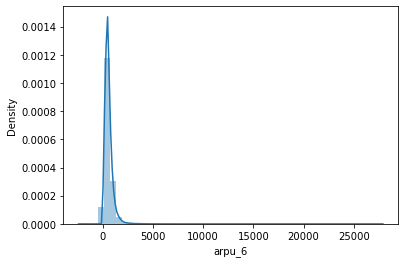

In [261]:
univariate(telecom_HVC.arpu_6)

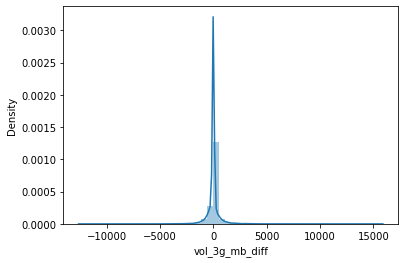

In [262]:
univariate(telecom_HVC.vol_3g_mb_diff)


## Bivariate EDA

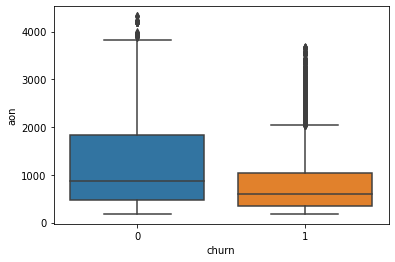

In [263]:
bivariate(telecom_HVC.churn, telecom_HVC.aon)

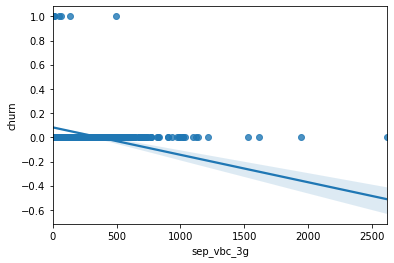

In [264]:
bivariate2(telecom_HVC.sep_vbc_3g, telecom_HVC.churn)

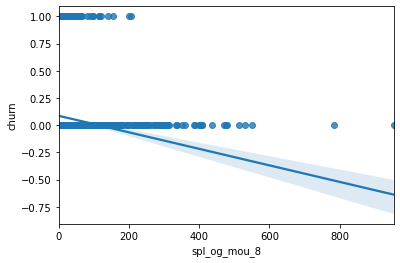

In [265]:
bivariate2(telecom_HVC.spl_og_mou_8, telecom_HVC.churn)


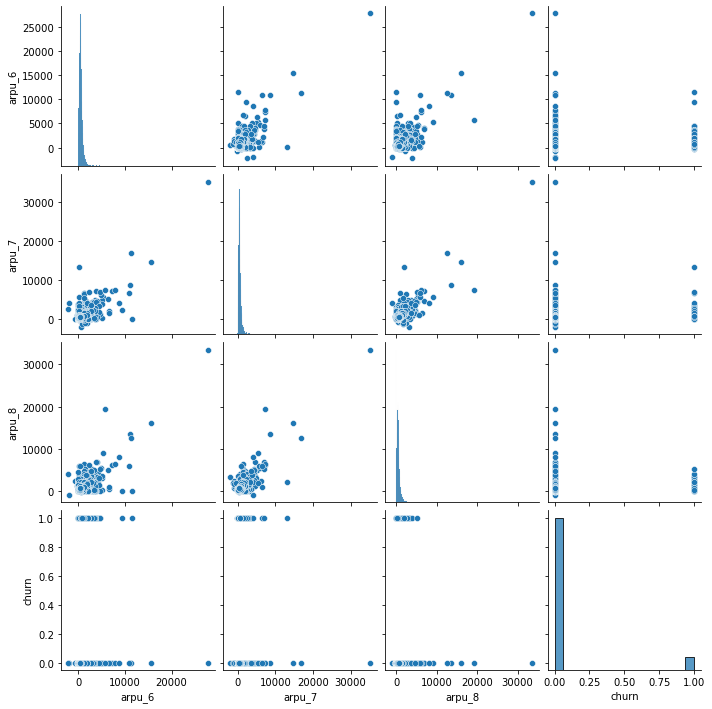

In [266]:
bv = telecom_HVC[['arpu_6','arpu_7', 'arpu_8', 'churn']]
sns.pairplot(bv)
plt.show()

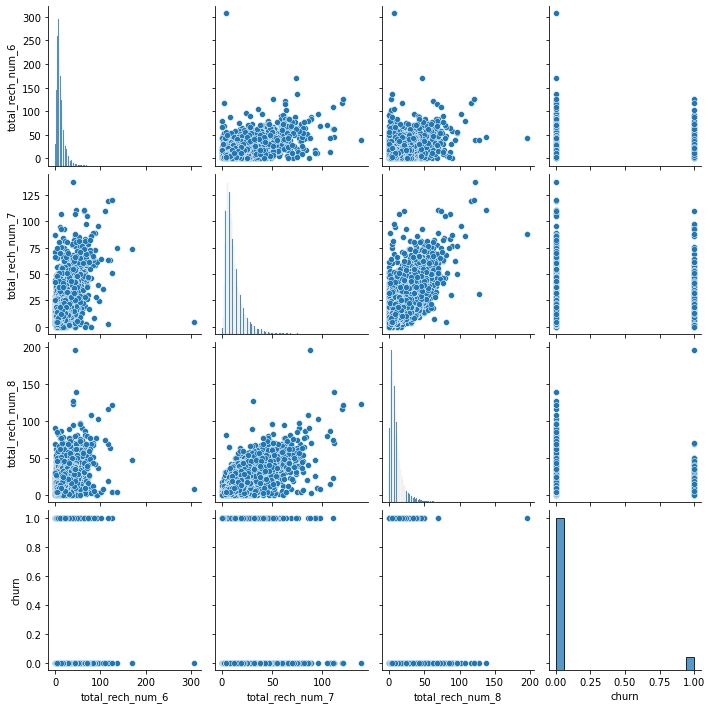

In [267]:
bv = telecom_HVC[['total_rech_num_6','total_rech_num_7', 'total_rech_num_8', 'churn']]
sns.pairplot(bv)
plt.show()

- The above graphs implying that the number recharges cannot solely contribute towards the churn behaviour of a customer
- Since the columns for September are not required for futher processing, these columns can be deleted.

# OUTLIER TREATMENT

# <font color=red> Few more graphs of numerica box plots

In [268]:
c=list(telecom_HVC.select_dtypes(exclude=object).columns) #selecting only columns with non object data type

In [269]:
## Creating function to identify the non categorical variables 
## using logic that categorical values would have few unique values, we will consider 10 unique values
num=[]
def num_col(na):
    for i in na:
        if len(telecom_HVC[i].unique())>10:
            num.append(i)
    return num

In [270]:
num_col(c) #numeric cols

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

In [271]:
telecom_HVC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29906 entries, 0 to 29905
Columns: 178 entries, mobile_number to vol_3g_mb_diff
dtypes: float64(144), int64(28), object(6)
memory usage: 40.6+ MB


In [272]:
telecom_HVC.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sep_vbc_3g,churn,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,2.990600e+04,29906.0,29906.0,29906.0,29906.0,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,...,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000
mean,7.001206e+09,109.0,0.0,0.0,0.0,558.806269,561.616785,509.247607,261.781639,268.857558,...,8.050003,0.080853,-1.813382,-76.237946,-10.504397,-0.140239,-6.483498,-13.165333,-20.005847,-5.730265
std,6.907405e+05,0.0,0.0,0.0,0.0,460.374956,480.202624,502.346776,459.812130,480.288163,...,52.453432,0.272614,6.757669,418.447953,136.941568,2.216733,78.378934,148.321470,256.356645,625.610187
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,-147.500000,-6950.000000,-3010.000000,-30.500000,-1303.000000,-3486.500000,-4740.925000,-12385.505000
25%,7.000609e+09,109.0,0.0,0.0,0.0,310.568500,310.641000,231.802000,20.010000,18.930000,...,0.000000,0.000000,-4.000000,-245.000000,-33.000000,-0.500000,-7.000000,-60.000000,-21.163750,-2.568750
50%,7.001203e+09,109.0,0.0,0.0,0.0,482.619000,481.813000,427.616000,84.780000,82.890000,...,0.000000,0.000000,-1.500000,-57.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001803e+09,109.0,0.0,0.0,0.0,700.290750,699.132750,662.286750,290.895000,290.755000,...,0.000000,0.000000,1.000000,99.500000,25.000000,0.000000,0.000000,9.500000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,2618.570000,1.000000,130.500000,14344.500000,3949.000000,52.500000,1352.000000,1805.000000,8062.295000,15646.390000


In [273]:
#Capping to remove outliers

def capp(df,col):
    for i in col:
        Q1 = df[i].quantile(0.05)
        df[i][df[i]<=Q1] = Q1
        Q3 = df[i].quantile(0.995)
        df[i][df[i]>=Q3] = Q3
    return df



In [274]:
num.pop(0)# remove mobile number

'mobile_number'

# <font color=red> same graphs of numerica box plots after outlier treatment

In [275]:
capp(telecom_HVC,num)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sep_vbc_3g,churn,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.38500,214.816,...,3.58,1,-1.5,-55.0000,0.0,0.0,0.0,0.0,-9.9750,-7.555
1,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.18000,1349.850,...,0.00,1,2.0,1330.2375,395.0,0.0,0.0,0.0,0.0000,0.000
2,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.72100,492.223,...,0.00,0,-6.0,-399.0000,-92.0,2.0,-54.0,-19.5,-177.9700,-363.535
3,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.45300,597.753,...,0.00,0,3.0,78.0000,0.0,0.0,0.0,0.0,0.0000,0.000
4,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,112.56825,193.897,...,0.00,0,0.0,212.0000,89.5,1.0,89.5,92.0,-0.2300,710.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29901,7000630859,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,384.31600,255.405,...,0.33,0,0.0,200.0000,0.0,0.0,0.0,0.0,34.1550,367.885
29902,7000661676,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,328.59400,202.966,...,0.00,0,0.0,-162.5000,-70.0,2.5,-75.0,-20.5,-341.0425,0.000
29903,7001729035,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,644.97300,455.228,...,0.00,0,-4.0,-691.0000,-174.0,0.0,9.5,9.5,-18.8750,-5.895
29904,7002111859,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,312.55800,512.932,...,0.00,0,-3.0,37.0000,52.0,0.5,77.0,77.0,0.7900,671.960


#### THE FINAL DATA HAS 29906 ROWS AND 178 COLUMNS

In [276]:
cat=np.setdiff1d(c,num)

In [277]:
cat

array(['churn', 'circle_id', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'loc_ic_t2o_mou', 'loc_og_t2o_mou', 'mobile_number',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2o_mou'],
      dtype='<U21')

In [278]:
for i in cat:
    print(i, telecom_HVC[i].unique())

churn [1 0]
circle_id [109]
fb_user_6 [1. 0.]
fb_user_7 [1. 0.]
fb_user_8 [1. 0.]
loc_ic_t2o_mou [0.]
loc_og_t2o_mou [0.]
mobile_number [7000842753 7000701601 7001524846 ... 7001729035 7002111859 7000498689]
monthly_2g_6 [0 2 1 3 4]
monthly_2g_7 [0 1 2 5 4 3]
monthly_2g_8 [0 1 2 5 3 4]
night_pck_user_6 [0. 1.]
night_pck_user_7 [0. 1.]
night_pck_user_8 [0. 1.]
std_ic_t2o_mou_6 [0.]
std_ic_t2o_mou_7 [0.]
std_ic_t2o_mou_8 [0.]
std_og_t2c_mou_6 [0.]
std_og_t2c_mou_7 [0.]
std_og_t2c_mou_8 [0.]
std_og_t2o_mou [0.]


In [279]:
o=list(telecom_HVC.select_dtypes(include=object).columns)

In [280]:
o

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8']

In [281]:
for i in o:
    print(i, telecom_HVC[i].unique())

last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014']
last_date_of_month_8 ['8/31/2014']
date_of_last_rech_6 ['6/30/2014']
date_of_last_rech_7 ['7/31/2014']
date_of_last_rech_8 ['8/31/2014']


In [282]:
#drop columns with only 1 value in it and mobile number 
telecom_HVC.drop(['loc_ic_t2o_mou', 'loc_og_t2o_mou','std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2o_mou','circle_id','mobile_number','last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8'], axis=1,inplace=True)

In [283]:
telecom_HVC.shape

(29906, 162)

In [284]:
cat=['churn', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8']

In [285]:

# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [286]:
telecom_HVC.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sep_vbc_3g,churn,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.00000,29906.000000,...,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000
mean,555.270465,557.604549,502.278049,257.244208,263.731724,230.513177,371.276089,375.274581,333.41953,14.604254,...,6.804923,0.080853,-1.483298,-63.014742,-1.896058,-0.039474,-3.317194,-7.425735,-6.184390,23.298202
std,367.703670,368.971907,395.386143,424.888492,439.304797,412.267087,448.139419,460.654884,430.15471,56.810102,...,34.237637,0.272614,5.282216,331.988784,84.571560,1.642864,61.475645,119.006666,169.188857,427.254666
min,112.568250,114.705000,10.365000,0.000000,0.000000,0.000000,3.190000,2.732500,0.89000,0.000000,...,0.000000,0.000000,-11.500000,-691.000000,-174.000000,-3.000000,-138.500000,-229.000000,-341.042500,-713.346250
25%,310.568500,310.641000,231.802000,20.010000,18.930000,15.660000,80.695000,78.587500,63.25000,0.000000,...,0.000000,0.000000,-4.000000,-245.000000,-33.000000,-0.500000,-7.000000,-60.000000,-21.163750,-2.568750
50%,482.619000,481.813000,427.616000,84.780000,82.890000,65.730000,222.860000,220.300000,183.03500,0.000000,...,0.000000,0.000000,-1.500000,-57.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,700.290750,699.132750,662.286750,290.895000,290.755000,240.710000,488.307500,494.437500,438.93750,0.000000,...,0.000000,0.000000,1.000000,99.500000,25.000000,0.000000,0.000000,9.500000,0.000000,0.000000
max,2415.050650,2387.891425,2397.232300,2717.454750,2777.184500,2717.414750,2750.005000,2894.600500,2820.84425,485.447500,...,325.730500,1.000000,22.000000,1330.237500,476.450000,8.500000,252.000000,581.000000,1113.003750,2857.503500



# SPLIT DATA INTO X and y

In [287]:
# divide data into train and test
X = telecom_HVC.drop("churn", axis = 1)
y = telecom_HVC.churn

# SCALING DATA 

In [288]:
scaler = StandardScaler() #using standard scaler

X[num] = scaler.fit_transform(X[num]) #standardizing data for numeric variables

X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,jun_vbc_3g,sep_vbc_3g,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,-0.973315,-0.929053,-0.729616,-0.524698,-0.526754,-0.559145,-0.613583,-0.615524,-0.773059,-0.257076,...,-0.142014,-0.094194,-0.003162,0.024142,0.022420,0.024028,0.053960,0.062399,-0.022405,-0.072214
1,1.397642,2.147206,4.792747,-0.469317,-0.475877,-0.432308,0.183325,0.416556,-0.017458,0.028618,...,-0.366519,-0.198759,0.659450,4.196755,4.693099,0.024028,0.053960,0.062399,0.036554,-0.054531
2,-0.480149,-0.177202,-0.922951,0.368211,0.198722,-0.474053,-0.617265,-0.639632,-0.457842,-0.257076,...,-0.084948,-0.198759,-0.855092,-1.012055,-1.065434,1.241434,-0.824451,-0.101460,-1.015365,-0.905408
3,-0.111008,0.108813,0.342663,-0.364417,-0.299619,-0.352625,0.862813,1.131898,1.511041,-0.257076,...,-0.417540,-0.198759,0.848767,0.424765,0.022420,0.024028,0.053960,0.062399,0.036554,-0.054531
4,-1.203985,-0.985749,-0.342233,-0.490217,-0.485028,-0.477691,-0.637906,-0.620680,-0.296479,-0.257076,...,-0.417540,-0.198759,0.280814,0.828399,1.080713,0.632731,1.509846,0.835478,0.035194,1.608147


In [289]:
X.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,jun_vbc_3g,sep_vbc_3g,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04,...,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04,29906.000000,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04,2.990600e+04
mean,1.660768e-16,2.200102e-16,-9.361126e-17,3.540121e-17,-2.708549e-17,4.205379e-17,-2.138328e-17,7.365353e-18,-4.846877e-17,-4.514249e-18,...,-5.464617e-17,3.635158e-17,-3.136215e-17,4.751841e-18,0.000000,-3.991546e-17,-2.874864e-17,-3.801473e-18,-3.326288e-17,2.328402e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.203985e+00,-1.200381e+00,-1.244154e+00,-6.054495e-01,-6.003489e-01,-5.591449e-01,-8.213789e-01,-8.087363e-01,-7.730593e-01,-2.570757e-01,...,-4.175403e-01,-1.987589e-01,-1.896339e+00,-1.891617e+00,-2.035044,-1.802082e+00,-2.199002e+00,-1.861895e+00,-1.979230e+00,-1.724163e+00
25%,-6.654980e-01,-6.693401e-01,-6.840922e-01,-5.583540e-01,-5.572573e-01,-5.211592e-01,-6.484276e-01,-6.440658e-01,-6.280858e-01,-2.570757e-01,...,-4.175403e-01,-1.987589e-01,-4.764562e-01,-5.481761e-01,-0.367789,-2.803239e-01,-5.990775e-02,-4.417832e-01,-8.853781e-02,-6.054325e-02
50%,-1.975849e-01,-2.054162e-01,-1.888364e-01,-4.059114e-01,-4.116612e-01,-3.997067e-01,-3.311884e-01,-3.364279e-01,-3.496115e-01,-2.570757e-01,...,-4.175403e-01,-1.987589e-01,-3.162047e-03,1.661151e-02,0.022420,2.402776e-02,5.396038e-02,6.239868e-02,3.655379e-02,-5.453092e-02
75%,3.944010e-01,3.835809e-01,4.046965e-01,7.920044e-02,6.151476e-02,2.473395e-02,2.611539e-01,2.586859e-01,2.453065e-01,-2.570757e-01,...,-1.487249e-01,-1.987589e-01,4.701321e-01,4.895270e-01,0.318033,2.402776e-02,5.396038e-02,1.422275e-01,3.655379e-02,-5.453092e-02
max,5.057908e+00,4.960588e+00,4.792747e+00,5.790347e+00,5.721528e+00,6.032359e+00,5.308100e+00,5.469101e+00,5.782725e+00,8.288158e+00,...,6.261082e+00,9.315214e+00,4.445803e+00,4.196755e+00,5.656205,5.198006e+00,4.153213e+00,4.944560e+00,6.615133e+00,6.633638e+00


# DATA PREP FOR MODELLING

#### Before we model, we need to handle the imbalnce in the data


In [290]:
100*y.value_counts(normalize=True) #percentage of churn and non churn

0    91.914666
1     8.085334
Name: churn, dtype: float64

#### There is high imbalance in data, we will use Informed Over Sampling: Synthetic Minority Over-sampling Technique

In [291]:
from imblearn.over_sampling import SMOTE #using SMOTE 
smote = SMOTE(random_state=0)
X_b, y_b = smote.fit_resample(X, y) # fitting the data and resampling

In [292]:
100*y_b.value_counts(normalize=True) #percentage of churn and non churn

1    50.0
0    50.0
Name: churn, dtype: float64

#### After balancing the data we have 50% of churn and 50% of non churn

# TEST TRAIN SPLIT

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size = 0.25, random_state = 0)

#### Now that we are done with hanlding imbalnace we will proceed with modelling

In [294]:

# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(41232, 161)
(41232,)
(13744, 161)
(13744,)


#### We see that we have 161 varibales which contribute to churn, we will have to reduce the number of varibales
#### In order to identify this, we will use the PCA technique

# PCA 

In [295]:
from sklearn.decomposition import PCA

In [296]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [297]:
pca.components_

array([[-1.09530636e-01, -1.00809128e-01, -4.94198933e-02, ...,
        -4.36598165e-02, -2.32868341e-02, -1.12742623e-02],
       [ 1.14225768e-01,  1.65356796e-01,  1.97862218e-01, ...,
         6.43299033e-02,  4.09671208e-02,  4.36460995e-02],
       [ 9.71181453e-02,  1.04349059e-01,  5.02131889e-02, ...,
         9.46793875e-03,  1.98011651e-02,  5.28604678e-03],
       ...,
       [ 2.49279967e-03, -1.87132397e-03, -1.99487544e-03, ...,
        -1.99946275e-04,  6.06399881e-04,  5.54639360e-05],
       [-8.23980729e-05, -1.34942114e-03,  3.54935717e-04, ...,
        -1.21676161e-03, -7.19402992e-04,  8.23087632e-04],
       [ 0.00000000e+00,  6.58785477e-17, -3.77144621e-16, ...,
         4.19283705e-17,  1.97522494e-16,  1.73995748e-18]])

In [298]:
pca.explained_variance_ratio_

array([1.15678292e-01, 1.01939615e-01, 6.22090932e-02, 5.32237064e-02,
       4.75367748e-02, 3.72195007e-02, 3.46543453e-02, 3.36950303e-02,
       2.67459797e-02, 2.46587396e-02, 2.00387991e-02, 1.95777526e-02,
       1.76548892e-02, 1.67287694e-02, 1.58638196e-02, 1.45208985e-02,
       1.40971047e-02, 1.28288336e-02, 1.21447929e-02, 1.17685721e-02,
       1.15585806e-02, 1.06311877e-02, 1.02851804e-02, 9.11178552e-03,
       8.77302515e-03, 8.60872386e-03, 8.36360418e-03, 7.99546209e-03,
       7.84386301e-03, 7.51689131e-03, 7.19185645e-03, 6.94284093e-03,
       6.66880235e-03, 6.33751545e-03, 6.10292802e-03, 6.04568676e-03,
       5.88151397e-03, 5.62507691e-03, 5.45726592e-03, 5.32476402e-03,
       5.25600889e-03, 4.96473213e-03, 4.85082803e-03, 4.76969333e-03,
       4.67833495e-03, 4.34559827e-03, 4.20081149e-03, 4.12244874e-03,
       4.04950006e-03, 4.00809435e-03, 3.91771610e-03, 3.75940869e-03,
       3.73636126e-03, 3.46165910e-03, 3.37344842e-03, 3.27911801e-03,
      

<BarContainer object of 161 artists>

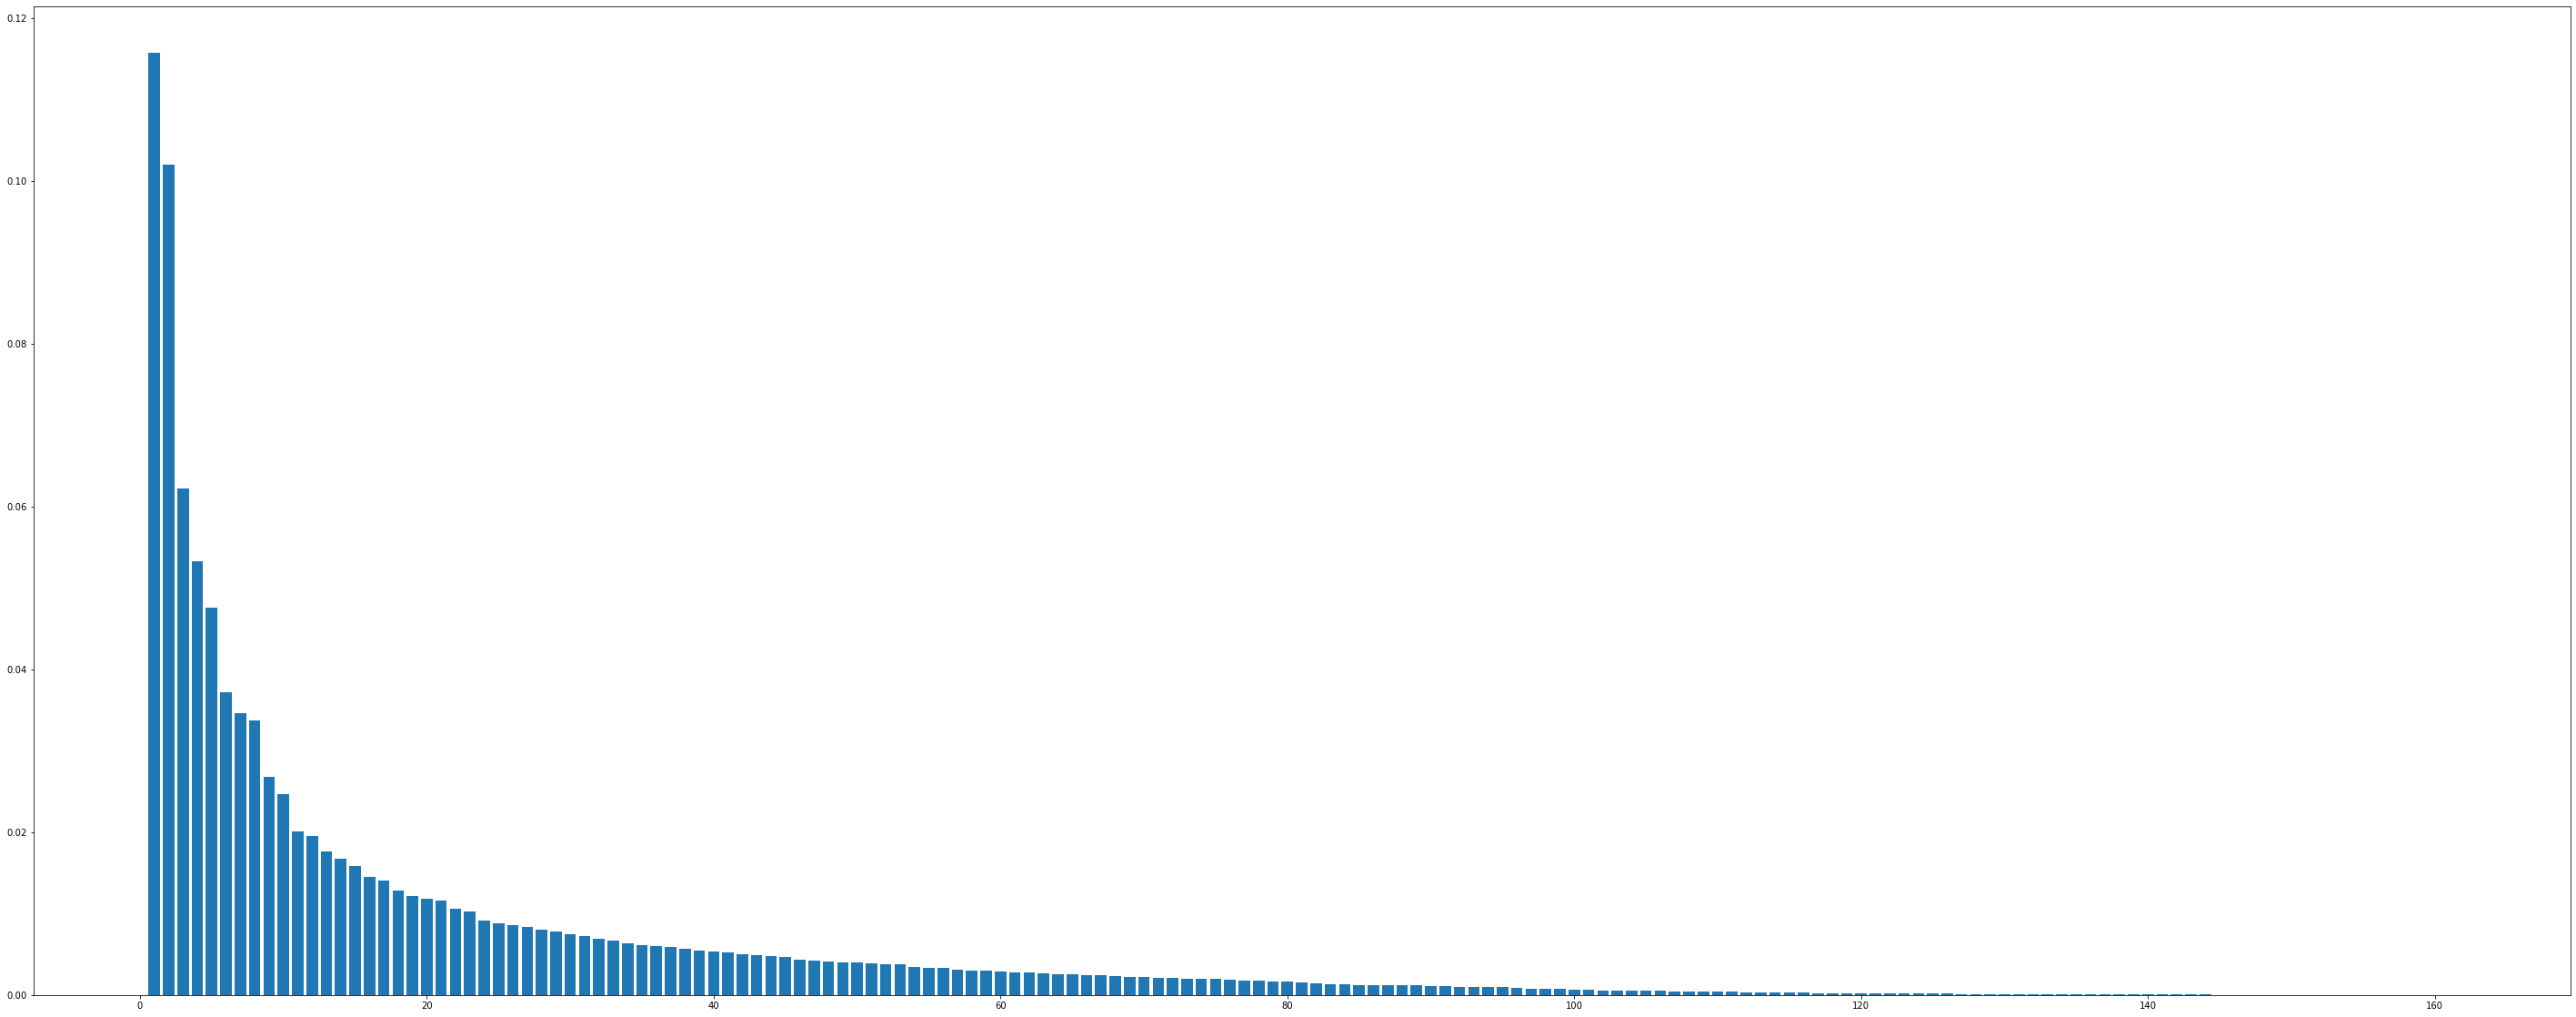

In [299]:
plt.figure(figsize=(50,20))
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

#### Making the scree plot

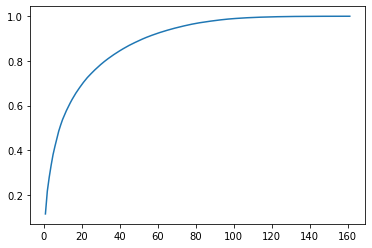

In [300]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

##### PCA with 60 components, as it explains 95% of data

In [301]:
pc60 = PCA(n_components=60, random_state=42)

In [302]:
X_train_PCA = pc60.fit_transform(X_train)

In [303]:
X_train_PCA.shape

(41232, 60)

#### NOw the train set has 60 independent variables



In [304]:
#Applying selected components to the test data - 60 components
X_test_PCA = pc60.transform(X_test)
X_test_PCA.shape

(13744, 60)

# <font color=red> PLEASE PERFORM MODELLING USING PCA THE FIRST 3 ones, MAKE SURE TO USE HYPER PARAMETER TUNING
1. Logistic Regression
2. Decision Tree
3. Random Forest

# <font color=red> NOTE FOR THE VARIABLES AND PARAMETER -> y_train_res is just y_train, X_train_pca is X_train_PCA same for test set 
    
    ANY DOUBT OR IF YOU WANT ME TO DO ANYTHING PLEASE TEXT OR CALL ME
    
 Also, use the function from there or directly use without it, but make sure its not same
    And values will be different cuz that guy did wrong and took only 35 elements and we took 6- after PCA
    
# <font color=red> ------------------ thats all--------------------------

For the business it is more important to identify churners than the non-churners accurately 
- Accuracy is a measure of the number of rightly predicted churn and non churn by the model. 
- Sensitivity is a measure of the number of rightly predicted Churn. 
- Specificity is a measure of how precisely the model is able to predict the number of churned cases.

Therefore, Sensitivity is the most important metric. 
Our aim is to maximize the sensitivity while ensuring accuracy and specificity do not take a big hit either.

Also, sensitivity is same as Recall or True Positive Rate

## <font color=blue> Will take care of the below 

# Model 4 - Boosting without PCA

In [305]:
# Original train and test without PCA
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(41232, 161)
(41232,)
(13744, 161)
(13744,)


##### this is our original data, has 161 columns

In [306]:
def calculate_metrics(confusion):
    
    print("Confusion matrix obtained is \n{val}".format(val=confusion))
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    print("\nAccuracy {val}%".format(val=round(((TP+TN)/(TP+TN+FP+FN))*100,2)))
    print("\nSensitivity/Recall/True Positive Rate {val}%".format(val=round((TP/(TP+FN))*100,2)))
    print("\nSpecificity {val}%".format(val=round((TN/(TN+FP))*100,2)))
    print("\nFalse Positive Rate {val}%".format(val=round((FP/(TN+FP))*100,2)))
    print("\nPrecision {val}%".format(val=round((TP/(TP+FP))*100,2)))


In [308]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
# base estimator: a weak learner with max_depth=6
shallow_tree = DecisionTreeClassifier(max_depth=6, random_state = 100)
# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# prediction on test dataset
y_pred = shallow_tree.predict(X_test)
boost_1 = confusion_matrix(y_test, y_pred)
calculate_metrics(boost_1)

Confusion matrix obtained is 
[[6224  610]
 [ 909 6001]]

Accuracy 88.95%

Sensitivity/Recall/True Positive Rate 86.85%

Specificity 91.07%

False Positive Rate 8.93%

Precision 90.77%


In [310]:
# adaboost with the tree as base estimator

estimators = list(range(1, 30, 3)) #increase the number of trees from 1 to 30 with a step of 3 in the lines:

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    cm = confusion_matrix(y_test, y_pred) 
    TP = cm[1,1]
    FN = cm[1,0]
    abc_scores.append(round((TP/(TP+FN))*100,2))
    print("\n\nThe value for all the relevant metrics for number of estimators {} \n".format(n_est))
    calculate_metrics(cm)



The value for all the relevant metrics for number of estimators 1 

Confusion matrix obtained is 
[[6223  611]
 [ 908 6002]]

Accuracy 88.95%

Sensitivity/Recall/True Positive Rate 86.86%

Specificity 91.06%

False Positive Rate 8.94%

Precision 90.76%


The value for all the relevant metrics for number of estimators 4 

Confusion matrix obtained is 
[[6236  598]
 [ 548 6362]]

Accuracy 91.66%

Sensitivity/Recall/True Positive Rate 92.07%

Specificity 91.25%

False Positive Rate 8.75%

Precision 91.41%


The value for all the relevant metrics for number of estimators 7 

Confusion matrix obtained is 
[[6403  431]
 [ 406 6504]]

Accuracy 93.91%

Sensitivity/Recall/True Positive Rate 94.12%

Specificity 93.69%

False Positive Rate 6.31%

Precision 93.79%


The value for all the relevant metrics for number of estimators 10 

Confusion matrix obtained is 
[[6392  442]
 [ 356 6554]]

Accuracy 94.19%

Sensitivity/Recall/True Positive Rate 94.85%

Specificity 93.53%

False Positive Rate 6.4

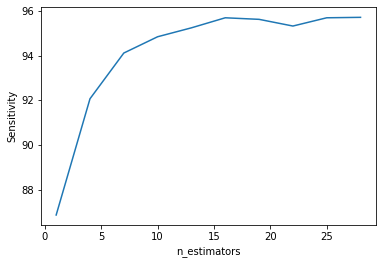

In [311]:
# plot test scores and n_estimators

plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('Sensitivity')

plt.show()

The sensitivity is max around 16

The value for all the relevant metrics for number of estimators 16 

Confusion matrix obtained is 
[[6495  339]
 [ 297 6613]]

Accuracy 95.37%

Sensitivity/Recall/True Positive Rate 95.7%

Specificity 95.04%

False Positive Rate 4.96%

Precision 95.12%


-------------------------

The value for all the relevant metrics for number of estimators 25 

Confusion matrix obtained is 
[[6454  380]
 [ 297 6613]]

Accuracy 95.07%

Sensitivity/Recall/True Positive Rate 95.7%

Specificity 94.44%

False Positive Rate 5.56%

Precision 94.57%

-------------------------------

The value for all the relevant metrics for number of estimators 28 

Confusion matrix obtained is 
[[6496  338]
 [ 296 6614]]

Accuracy 95.39%

Sensitivity/Recall/True Positive Rate 95.72%

Specificity 95.05%

False Positive Rate 4.95%

Precision 95.14%


##### OF all the estimators 16, 25 and 28 has the best sensitivity without compramising other matrices 



In [315]:
# base estimator: a weak learner with max_depth = 11
shallow_tree2 = DecisionTreeClassifier(max_depth = 11, random_state = 100)
# fit the shallow decision tree 
shallow_tree2.fit(X_train, y_train)

# test error
boost_2 = shallow_tree2.predict(X_test)
cm = confusion_matrix(y_test, boost_2)
calculate_metrics(cm)

Confusion matrix obtained is 
[[6171  663]
 [ 443 6467]]

Accuracy 91.95%

Sensitivity/Recall/True Positive Rate 93.59%

Specificity 90.3%

False Positive Rate 9.7%

Precision 90.7%


In [316]:
# adaboost with the tree as base estimator

estimators = list(range(1, 30, 3)) #increase the number of trees from 1 to 30 with a step of 3 in the lines:

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree2, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    cm = confusion_matrix(y_test, y_pred) 
    TP = cm[1,1]
    FN = cm[1,0]
    abc_scores.append(round((TP/(TP+FN))*100,2))
    print("\n\nThe value for all the relevant metrics for number of estimators {} \n".format(n_est))
    calculate_metrics(cm)



The value for all the relevant metrics for number of estimators 1 

Confusion matrix obtained is 
[[6168  666]
 [ 444 6466]]

Accuracy 91.92%

Sensitivity/Recall/True Positive Rate 93.57%

Specificity 90.25%

False Positive Rate 9.75%

Precision 90.66%


The value for all the relevant metrics for number of estimators 4 

Confusion matrix obtained is 
[[6206  628]
 [ 415 6495]]

Accuracy 92.41%

Sensitivity/Recall/True Positive Rate 93.99%

Specificity 90.81%

False Positive Rate 9.19%

Precision 91.18%


The value for all the relevant metrics for number of estimators 7 

Confusion matrix obtained is 
[[6241  593]
 [ 433 6477]]

Accuracy 92.53%

Sensitivity/Recall/True Positive Rate 93.73%

Specificity 91.32%

False Positive Rate 8.68%

Precision 91.61%


The value for all the relevant metrics for number of estimators 10 

Confusion matrix obtained is 
[[6396  438]
 [ 346 6564]]

Accuracy 94.3%

Sensitivity/Recall/True Positive Rate 94.99%

Specificity 93.59%

False Positive Rate 6.41

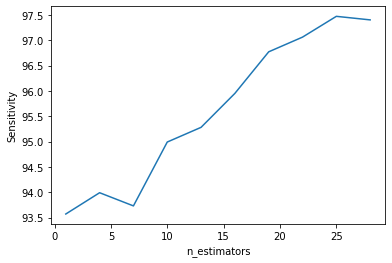

In [317]:
# plot test scores and n_estimators

plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('Sensitivity')

plt.show()

In [318]:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree2, 
    n_estimators = 23)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    cm = confusion_matrix(y_test, y_pred) 
    TP = cm[1,1]
    FN = cm[1,0]
    abc_scores.append(round((TP/(TP+FN))*100,2))
    print("\n\nThe value for all the relevant metrics for number of estimators {} \n".format(n_est))
    calculate_metrics(cm)



The value for all the relevant metrics for number of estimators 28 

Confusion matrix obtained is 
[[6449  385]
 [ 186 6724]]

Accuracy 95.85%

Sensitivity/Recall/True Positive Rate 97.31%

Specificity 94.37%

False Positive Rate 5.63%

Precision 94.58%


The value for all the relevant metrics for number of estimators 25 

Confusion matrix obtained is 
[[6442  392]
 [ 175 6735]]

Accuracy 95.87%

Sensitivity/Recall/True Positive Rate 97.47%

Specificity 94.26%

False Positive Rate 5.74%

Precision 94.5%

### shallow_tree estimator 28 

The value for all the relevant metrics for number of estimators 28

Confusion matrix obtained is [[6496 338] [ 296 6614]]

Accuracy 95.39%

Sensitivity/Recall/True Positive Rate 95.72%

Specificity 95.05%

False Positive Rate 4.95%

Precision 95.14%

#### For shallow_tree 2 estimator 25 has best model
### Overall best model is shallow_tree 2 estimator 25, depth 11.

In [320]:
features = list(X_train.columns[0:])

<AxesSubplot:>

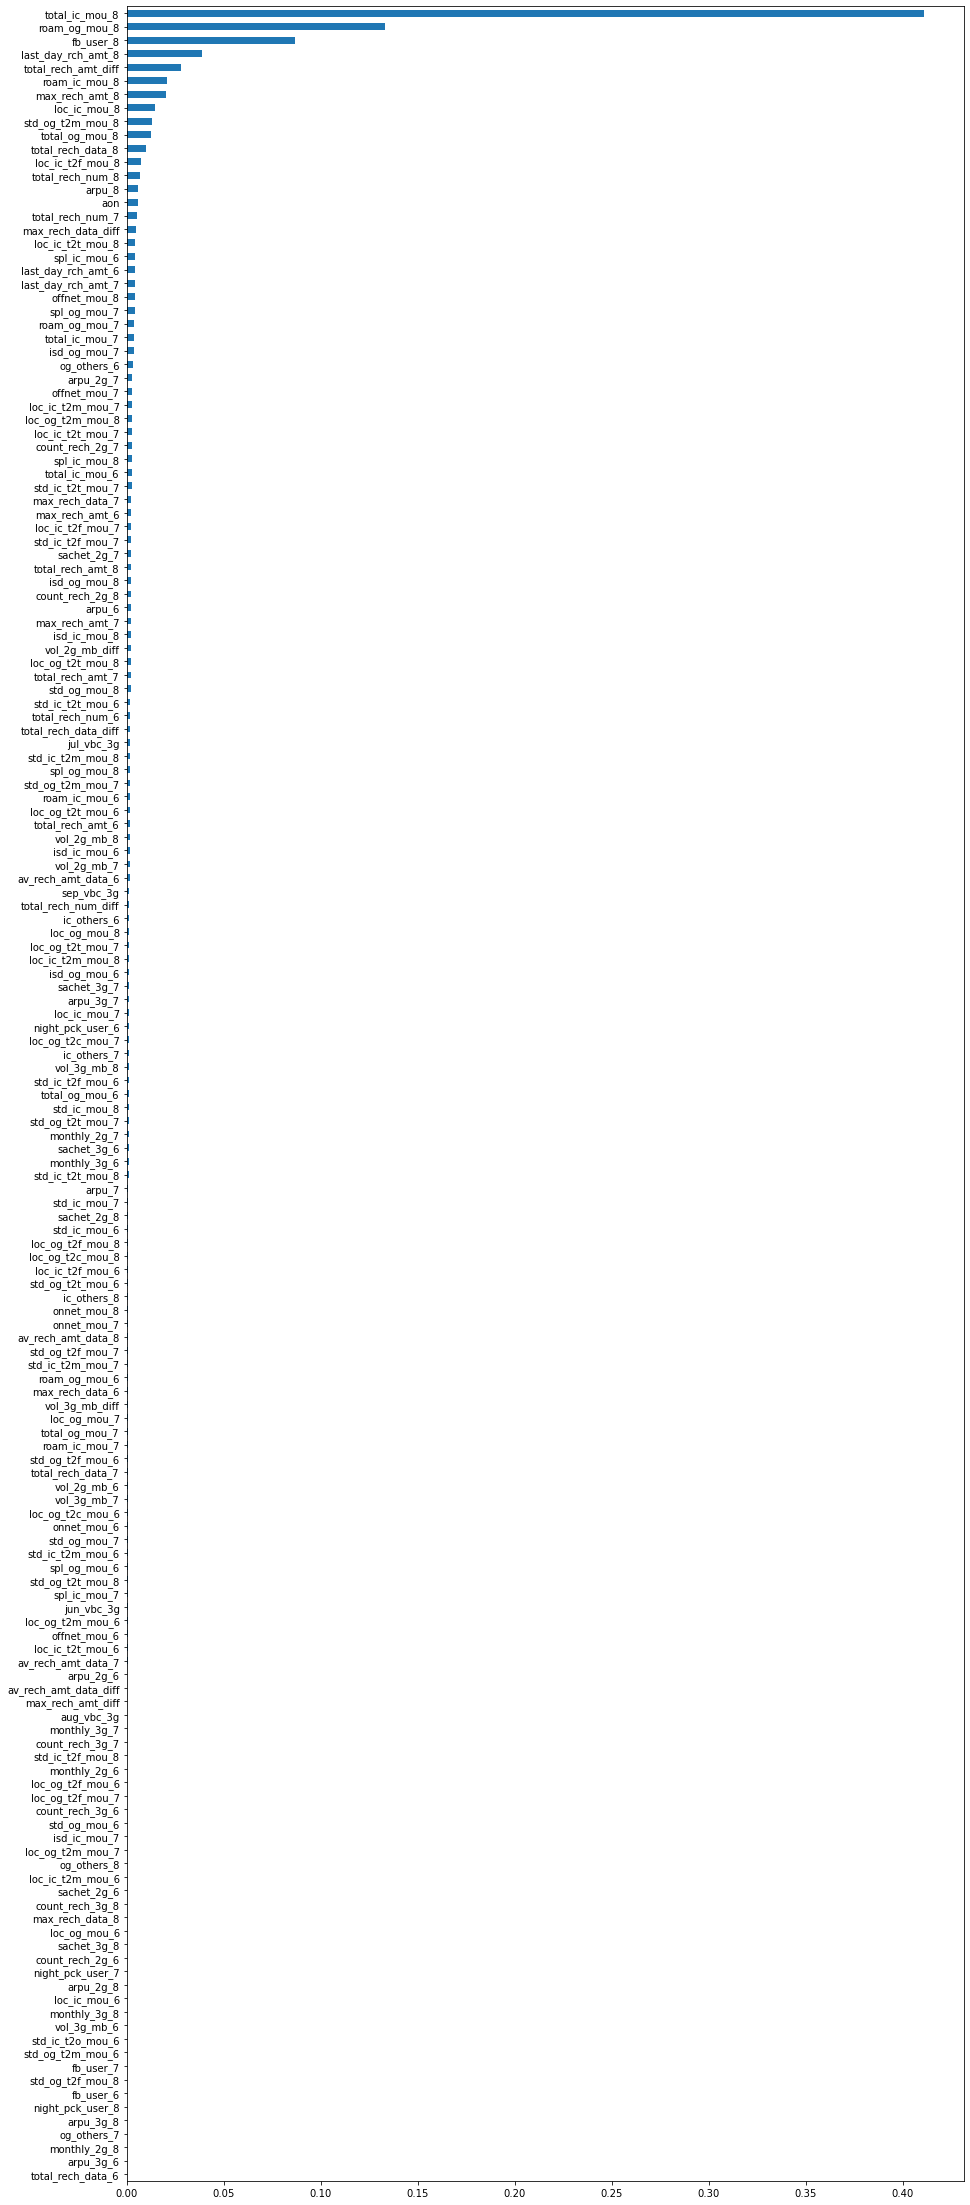

In [326]:

plt.figure(figsize=(15,40))
feat_importances = pd.Series(shallow_tree2.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

In [ ]:
the graph above suggest that the top 25 features ranked in order of importance as produced by our RandomForest implementation are the features that belong to month 8 i.e., the action month. Hence, it is clear that what happens in the action phase has a direct impact on the customer churn of high value customers. Specifically, these features are as follows:

total_ic_mou_8 -- Total incoming minutes of usage in month 8
roam_og_mou_8 -- outgoing roaming calls minutes of usage in month 8
fb_user_8 -- services of Facebook and similar social networking sites for month 8
last_day_rch_amt_8 -- last (most recent) recharge amount in month 8
total_rech_amt_data_8 -- total recharge amount for data in month 8
roam_ic_mou_8 -- incoming roaming calls minutes of usage in month 8
max_rech_data_8 -- maximum data recharge (MB) in month 8
loc_ic_mou_8 -- local incoming minutes of usage in month 8
total_month_rech_8 -- Total month recharge amount in month 8
total_roam_mou_8 -- Total incoming+outgoing roaming minutes of usage in month 8
loc_ic_t2m_mou_8 -- local incoming calls to another operator minutes of usage in month 8
Total_loc_mou_8 -- Total local minutes of usage in month 8
total_rech_amt_8 -- total recharge amount in month 8
loc_ic_t2t_mou_8 -- local incoming calls from same operator minutes of usage in month 8
max_rech_amt_8 -- maximum recharge amount in month 8
arpu_8 -- average revenue per user in month 8
loc_og_mou_8 -- local outgoing calls minutes of usage in month 8
loc_og_t2n_mou_8 -- local outgoing calls minutes of usage to other operator mobile in month 8
av_rech_amt_data_8 -- average recharge amount for mobile data in month 8
total_rech_data_8 -- total data recharge (MB) in month 8
total_og_t2t_mou_8 -- total outgoing calls from same operator minutes of usage in month 8
total_rech_num_8 -- total number of recharges done in the month 8
avg_rech_amt_8 -- average recharge amount in month 8
vol_data_mb_8 -- volume of data (MB) consumed for month 8
count_rech_2g_8 -- Number of 2g data recharge in month 8
loc_og_to_ic_mou_8 -- local outgoing to incoming mou ratio for month of 8
spl_og_mou_7 -- Special outgoing call for the month of 7